In [2]:
import numpy
import matplotlib.pyplot as plt #visualized data
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/Users/skidnp/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/skidnp/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/skidnp/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/skidnp/anaconda3/lib/python3.6/site-packages/t

In [3]:
dataframe = read_csv('train_clean.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype("float32")

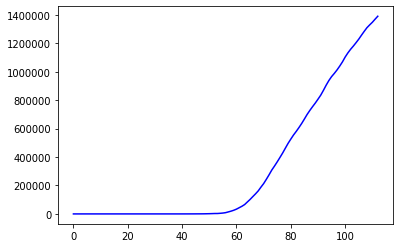

In [4]:
plt.plot(dataset,color = 'blue')
plt.show()


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)


In [6]:
#normalization
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


In [7]:
#spliting dataset, 67% train, 23% test
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]


In [8]:
look_back = 1 #reshape
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainY)

#reshape to be [samples, time steps, features]
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))


[0.00000000e+00 7.19214881e-07 7.19214881e-07 2.87685953e-06
 2.87685953e-06 2.87685953e-06 2.87685953e-06 2.87685953e-06
 4.31528952e-06 5.03450428e-06 5.03450428e-06 7.19214859e-06
 7.19214859e-06 7.19214859e-06 7.19214859e-06 7.19214859e-06
 7.19214859e-06 7.19214859e-06 7.19214859e-06 7.91136426e-06
 7.91136426e-06 8.63057903e-06 8.63057903e-06 8.63057903e-06
 8.63057903e-06 8.63057903e-06 8.63057903e-06 8.63057903e-06
 8.63057903e-06 1.00690086e-05 1.00690086e-05 1.00690086e-05
 1.00690086e-05 1.00690086e-05 1.00690086e-05 1.07882233e-05
 1.07882233e-05 1.65419424e-05 2.08572310e-05 3.73991752e-05
 5.17834742e-05 7.40791365e-05 1.22985744e-04 1.55350412e-04
 2.40936992e-04 3.22927488e-04 3.68957233e-04 5.08484896e-04
 7.94013205e-04 1.11909839e-03 1.54343515e-03 2.05407781e-03
 2.09794985e-03 3.09693930e-03 4.38361429e-03 6.38087420e-03
 1.01358956e-02 1.39542073e-02 1.85010843e-02 2.41893549e-02
 3.14023606e-02 3.86470109e-02 4.73077968e-02 6.02953807e-02
 7.31125027e-02 8.735871

In [9]:
#build lstm
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))# output = activation(dot(input,kernel)+bias) (link)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)#verbose 2 display for each epoch
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#reverse to original dataset form
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('train score is',trainScore)
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('test score is',testScore)




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0027
Epoch 2/100
 - 0s - loss: 0.0025
Epoch 3/100
 - 0s - loss: 0.0025
Epoch 4/100
 - 0s - loss: 0.0024
Epoch 5/100
 - 0s - loss: 0.0024
Epoch 6/100
 - 0s - loss: 0.0023
Epoch 7/100
 - 0s - loss: 0.0023
Epoch 8/100
 - 0s - loss: 0.0022
Epoch 9/100
 - 0s - loss: 0.0021
Epoch 10/100
 - 0s - loss: 0.0021
Epoch 11/100
 - 0s - loss: 0.0020
Epoch 12/100
 - 0s - loss: 0.0019
Epoch 13/100
 - 0s - loss: 0.0019
Epoch 14/100
 - 0s - loss: 0.0018
Epoch 15/100
 - 0s - loss: 0.0017
Epoch 16/100
 - 0s - loss: 0.0016
Epoch 17/100
 - 0s - loss: 0.0015
Epoch 18/100
 - 0s - loss: 0.0014
Epoch 19/100
 - 0s - loss: 0.0014
Epoch 20/100
 - 0s - loss: 0.0011
Epoch 21/100
 - 0s - loss: 0.0010
Epoch 22/100
 - 0s - loss: 8.7638e-04
Epoch 23/100
 - 0s - loss: 7.6316e-04
Epoch 24/100
 - 0s - loss: 6.1934e-04
Epoch 25/100
 - 0s - loss: 5.0446e-04
Epoch 26/100
 - 0s - lo

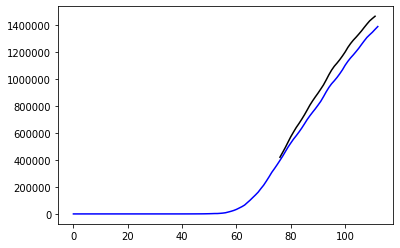

In [11]:
trainplot = numpy.empty_like(dataset)
trainplot[:,:] = numpy.nan#initalize it as not_a_number
trainplot[look_back:len(trainPredict)+look_back,:] = trainPredict

testplot = numpy.empty_like(dataset)
testplot[:,:] = numpy.nan
testplot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict


plt.plot(scaler.inverse_transform(dataset),color = 'blue')
plt.plot(testplot,color = 'black')



